In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from PIL import Image
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
os.getcwd()

'/Users/bogdan/python3/c/Springboard/Springboard/Capstone_Project_2'

In [4]:
ls -ltrh ./data/*.mov

-rwxrwxrwx@ 1 bogdan  staff   630M Feb 16 14:16 ./data/zero-to-five.mov*


In [5]:
# extract jpeg frames from .mov file: already done

# vidcap = cv2.VideoCapture('./Data/zero-to-five.mov')
# success,image = vidcap.read()
# count = 0

# while success:
#     cv2.imwrite("./Data/frame%d.jpg" % count, image)     # save frame as JPEG file      
#     success,image = vidcap.read()
#     if count%30 == 0:  # 30 frames per second for .mov video file
#         print('Reading the frame: ', count)
#     count += 1

# print('The last frame is: ', count)

In [6]:
# move manually the extracted frames to corresponding categories
# bases on frame number and time used for recording the 0 to 5 signs

In [7]:
# move 30% of all jpgs from /train to corresponding /test categories
# by simply moving to /test all frames that end with digits 0, 4 and 7

# mv ./data/train/0/*0.jpg ./data/test/0/
# mv ./data/train/0/*4.jpg ./data/test/0/
# mv ./data/train/0/*7.jpg ./data/test/0/
# mv ./data/train/1/*0.jpg ./data/test/1/
# mv ./data/train/1/*4.jpg ./data/test/1/
# mv ./data/train/1/*7.jpg ./data/test/1/
# mv ./data/train/2/*0.jpg ./data/test/2/
# mv ./data/train/2/*4.jpg ./data/test/2/
# mv ./data/train/2/*7.jpg ./data/test/2/
# mv ./data/train/3/*0.jpg ./data/test/3/
# mv ./data/train/3/*4.jpg ./data/test/3/
# mv ./data/train/3/*7.jpg ./data/test/3/
# mv ./data/train/4/*0.jpg ./data/test/4/
# mv ./data/train/4/*4.jpg ./data/test/4/
# mv ./data/train/4/*7.jpg ./data/test/4/
# mv ./data/train/5/*0.jpg ./data/test/5/
# mv ./data/train/5/*4.jpg ./data/test/5/
# mv ./data/train/5/*7.jpg ./data/test/5/

In [8]:
!du -h ./data/train

289M	./data/train/1
230M	./data/train/4
279M	./data/train/3
270M	./data/train/2
246M	./data/train/5
1.3G	./data/train


In [9]:
!du -h ./data/test

126M	./data/test/1
 99M	./data/test/4
122M	./data/test/3
118M	./data/test/2
107M	./data/test/5
572M	./data/test


In [10]:
!find ./data/train -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

1759 ./data/train/4
1869 ./data/train/5
2074 ./data/train/2
2124 ./data/train/3
2240 ./data/train/1
10068 ./data/train


In [11]:
!find ./data/test -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

747 ./data/test/4
799 ./data/test/5
887 ./data/test/2
913 ./data/test/3
962 ./data/test/1
4310 ./data/test


After moving train and test data to corresponding classes, there are:

- 10068 training jpgs (including 6 directories so total = 10061)
- 4310 test jpgs (including 6 directories so total = 4303)
- 1.3 GB used for training jpgs
- 572 MB used for test jpgs

The number of files for each of the 5 classes in /train and /test is relatively equal with the exception of the classes 4 and 5 where I had to delete more jpgs due to recording issues.

In [12]:
print("tensorflow: ", tf.__version__)
print("cv2: ", cv2.__version__)

tensorflow:  2.0.0
cv2:  3.4.2


In [13]:
image0 = imread('./data/train/1/frame10201.jpg')
type(image0)

numpy.ndarray

In [14]:
image0.shape

(720, 1080, 3)

In [15]:
# This function will plot training images in the form of a grid with 1 row and 5 columns 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [16]:
samples=[]
#samples.append(imread('./data/train/0/frame16768.jpg')) # sample class 0
samples.append(imread('./data/train/1/frame10118.jpg')) # sample class 1
samples.append(imread('./data/train/2/frame1.jpg')) # sample class 2
samples.append(imread('./data/train/3/frame3398.jpg')) # sample class 3
samples.append(imread('./data/train/4/frame6765.jpg')) # sample class 4
samples.append(imread('./data/train/5/frame13421.jpg')) # sample class 5

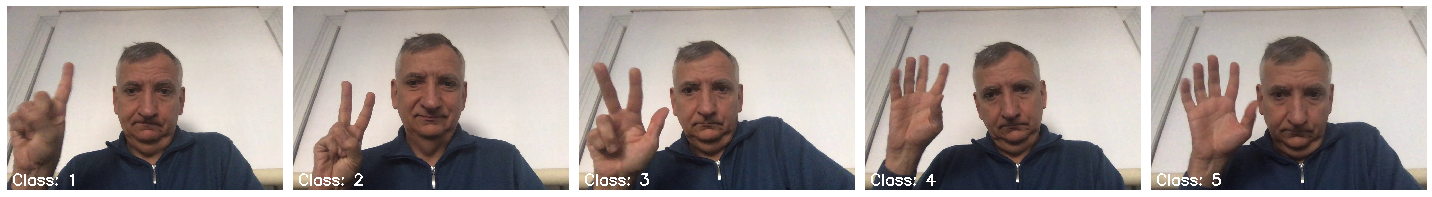

In [17]:
# Print the classes inside each jpeg sample
font      = cv2.FONT_HERSHEY_SIMPLEX
position  = (20,700)
fontScale = 2
fontColor = (255,255,255)
lineType  = 5

#cv2.putText(samples[0], 'Class: 0', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[0], 'Class: 1', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[1], 'Class: 2', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[2], 'Class: 3', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[3], 'Class: 4', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[4], 'Class: 5', position, font, fontScale, fontColor, lineType)

plotImages(samples)

In [18]:
# parameters
train_dir = './data/train'
test_dir = './data/test'
batch_size = 16
epochs = 10
# will rescale all jpeg images to 255x255 for having a reasonable time for the training
IMG_HEIGHT = 255
IMG_WIDTH = 255

image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [21]:
image_gen = ImageDataGenerator(rotation_range=10, # randomly rotate the image with <=10 degrees
                               #width_shift_range=0.10, # Shift the pic width by a max of 10%
                               #height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Normalize the image
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [22]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 10061 images belonging to 5 classes.


In [23]:
test_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=test_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                             )

Found 4303 images belonging to 5 classes.


The number of /train images is 10061, the number of /test images is 4303, as counted earlier with the bash commands

In [24]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [138]:
# This function will plot images in the form of a grid with 1 row and 5 columns 
# where images are placed in each column.
def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    i=1
    for label in labels_arr:
        print("Image", i, " one-hot encoded class:", label)
        i+=1

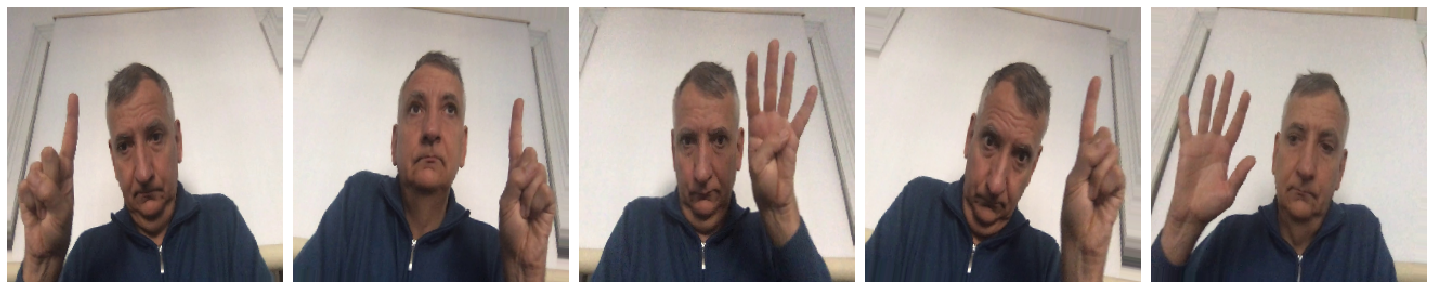

Image 1  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 2  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 3  one-hot encoded class: [0. 0. 0. 1. 0.]
Image 4  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 5  one-hot encoded class: [0. 0. 0. 0. 1.]


In [26]:
plotImages(sample_training_images[:5], sample_training_labels[:5])

ImageDataGenerator did the following:

- rotated the image by no more than of +- 20%
- no horizontal or vertical shift because the hand is close to one edge in some jpgs
- normalized the 0...255 values to the float interval 0...1
- rescaled the image to 255 x 255 pixels
- returned the image itself and the one-hot encoded class based on the class directory

In [27]:
sample_training_images[0].shape

(255, 255, 3)

In [28]:
print(sample_training_images[0].min(), sample_training_images[0].max())

0.058867685 0.98450613


In [29]:
train_data_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

In [30]:
test_data_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

The classes are 0, 1, 2, 3, 4, 5 for both train and test data

In [31]:
image_shape

(255, 255, 3)

# Training the model

In [82]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix

# Model 1, one Conv2D layer, 16 filters

In [86]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
#use patience=2 since the data and the CNN model itself is noisy
# and may have a decreased performance for one epoch

In [37]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(255))
model.add(Activation('relu'))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 115600)            0         
_________________________________________________________________
dense (Dense)                (None, 255)               29478255  
_________________________________________________________________
activation (Activation)      (None, 255)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1280      
Total params: 29,479,983
Trainable params: 29,479,983
Non-trainable params: 0
____________________________________________

In [212]:
history = model.fit_generator(train_data_gen,
                              epochs=epochs,
                              validation_data=test_data_gen,
                              callbacks=[early_stop])

Epoch 1/10
629/629 [==============================] - 3900s 6s/step - loss: 12.5186 - accuracy: 0.2223 - val_loss: 12.5187 - val_accuracy: 0.2233
Epoch 2/10
629/629 [==============================] - 2227s 4s/step - loss: 12.5307 - accuracy: 0.2225 - val_loss: 12.5187 - val_accuracy: 0.2233
Epoch 3/10
629/629 [==============================] - 1728s 3s/step - loss: 12.5315 - accuracy: 0.2225 - val_loss: 12.5187 - val_accuracy: 0.2233


In [221]:
model.save('model1-one-CNN-layer-16-filters.h5')

In [214]:
losses_model1 = pd.DataFrame(model.history.history)
losses_model1

loss  accuracy   val_loss  val_accuracy
0  12.517577  0.222344  12.518737      0.223333
1  12.531134  0.222542  12.518737      0.223333
2  12.531134  0.222542  12.518737      0.223333

In [215]:
print(model.metrics_names)
print(model.evaluate(test_data_gen,verbose=0))

['loss', 'accuracy']
[206.91053590455462, 0.22333255]


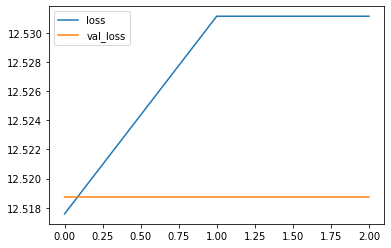

In [217]:
losses_model1[['loss','val_loss']].plot()

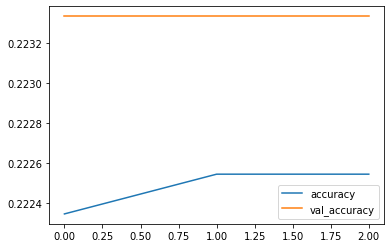

In [218]:
losses_model1[['accuracy','val_accuracy']].plot()

In [ ]:
# the result is very poor, the 0.22 accuracy is marginally superior
# to the 0.2 accuracy for a random choice for one of the five classes

# Model 2, one Conv2D layer, 32 filters

In [219]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(255))
model.add(Activation('relu'))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [220]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 255, 255, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 231200)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 255)               58956255  
_________________________________________________________________
activation_5 (Activation)    (None, 255)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 1280      
Total params: 58,958,431
Trainable params: 58,958,431
Non-trainable params: 0
__________________________________________

In [222]:
history = model.fit_generator(train_data_gen,
                              epochs=epochs,
                              validation_data=test_data_gen,
                              callbacks=[early_stop])

Epoch 1/10
629/629 [==============================] - 8414s 13s/step - loss: 12.5200 - accuracy: 0.2220 - val_loss: 12.5182 - val_accuracy: 0.2233
Epoch 2/10
629/629 [==============================] - 2983s 5s/step - loss: 12.5315 - accuracy: 0.2225 - val_loss: 12.5182 - val_accuracy: 0.2233
Epoch 3/10
629/629 [==============================] - 9887s 16s/step - loss: 12.5318 - accuracy: 0.2225 - val_loss: 12.5180 - val_accuracy: 0.2233
Epoch 4/10
629/629 [==============================] - 2923s 5s/step - loss: 12.5311 - accuracy: 0.2225 - val_loss: 12.5182 - val_accuracy: 0.2233
Epoch 5/10
629/629 [==============================] - 3836s 6s/step - loss: 12.5300 - accuracy: 0.2225 - val_loss: 12.5185 - val_accuracy: 0.2233


In [223]:
model.save('model2-one-CNN-layer-32-filters.h5')

In [224]:
losses_model2 = pd.DataFrame(model.history.history)
losses_model2

loss  accuracy   val_loss  val_accuracy
0  12.519338  0.222046  12.518238      0.223333
1  12.531134  0.222542  12.518238      0.223333
2  12.531134  0.222542  12.517988      0.223333
3  12.531134  0.222542  12.518238      0.223333
4  12.531134  0.222542  12.518487      0.223333

In [225]:
print(model.metrics_names)
print(model.evaluate(test_data_gen,verbose=0))

['loss', 'accuracy']
[524.5780214217516, 0.22333255]


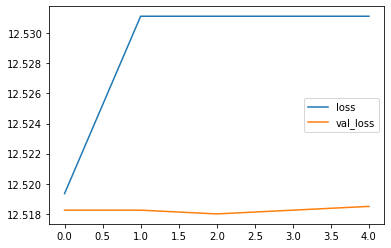

In [226]:
losses_model2[['loss','val_loss']].plot()

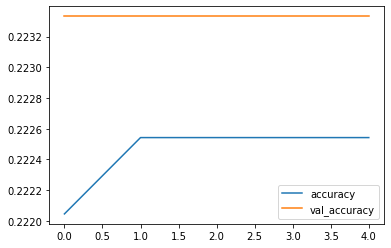

In [227]:
losses_model2[['accuracy','val_accuracy']].plot()

In [228]:
# The overall performance of model2 is almost identical with the one for model 1
# It looks like one hidden CNN layer is not enough

# Model 3, two Conv2D layers with 16 and 32 filters

In [229]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(255))
model.add(Activation('relu'))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [230]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 85, 85, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 255)               6397695   
_________________________________________________________________
activation_6 (Activation)    (None, 255)              

In [231]:
history = model.fit_generator(train_data_gen,
                              epochs=epochs,
                              validation_data=test_data_gen,
                              callbacks=[early_stop])

Epoch 1/10
629/629 [==============================] - 1516s 2s/step - loss: 0.4702 - accuracy: 0.8340 - val_loss: 0.1422 - val_accuracy: 0.9526
Epoch 2/10
629/629 [==============================] - 1517s 2s/step - loss: 0.1115 - accuracy: 0.9606 - val_loss: 0.0828 - val_accuracy: 0.9733
Epoch 3/10
629/629 [==============================] - 1519s 2s/step - loss: 0.0738 - accuracy: 0.9755 - val_loss: 0.0337 - val_accuracy: 0.9891
Epoch 4/10
629/629 [==============================] - 1674s 3s/step - loss: 0.0513 - accuracy: 0.9857 - val_loss: 0.0232 - val_accuracy: 0.9928
Epoch 5/10
629/629 [==============================] - 1859s 3s/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0125 - val_accuracy: 0.9951
Epoch 6/10
629/629 [==============================] - 1583s 3s/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0213 - val_accuracy: 0.9935
Epoch 7/10
629/629 [==============================] - 1940s 3s/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0272 - val_accuracy:

In [232]:
model.save('model3-two-CNN-layers.h5')

In [233]:
losses_model3 = pd.DataFrame(model.history.history)
losses_model3

loss  accuracy  val_loss  val_accuracy
0  0.470262  0.834013  0.142241      0.952591
1  0.111455  0.960640  0.082805      0.973274
2  0.073808  0.975549  0.033666      0.989077
3  0.051325  0.985687  0.023230      0.992796
4  0.030206  0.990160  0.012490      0.995120
5  0.025733  0.992347  0.021281      0.993493
6  0.017763  0.994434  0.027216      0.993493

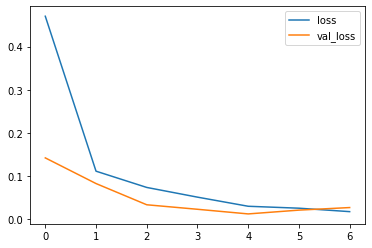

In [234]:
losses_model3[['loss','val_loss']].plot()

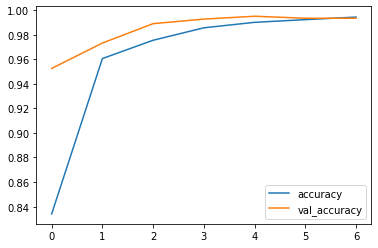

In [235]:
losses_model3[['accuracy','val_accuracy']].plot()

In [246]:
# It looks like model 3 is much better at least for the train and test datasets.
# On the diagrams above it is shown clearly how the early_stop fired when needed,
# that is when the loss on the validation data started to increase.
# This was done in order to avoid overfitting on the training data.

In [237]:
model.metrics_names

['loss', 'accuracy']

In [236]:
model.evaluate_generator(test_data_gen)

[0.025010001586673398, 0.9927957]

In [163]:
test_images, test_labels = next(test_data_gen)

In [164]:
size_test = len(test_labels)
size_test

16

In [165]:
test_labels

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [166]:
predictions = model.predict_classes(test_images)

In [167]:
print(predictions)

[0 3 4 4 4 4 3 1 0 4 4 2 4 4 1 0]


In [168]:
print(len(predictions))

16


In [169]:
labels = []
for result in test_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

In [170]:
type(labels)

numpy.ndarray

In [171]:
type(predictions)

numpy.ndarray

In [172]:
print(labels)

[0 3 4 4 4 4 3 1 0 4 4 2 4 4 1 0]


In [173]:
print(predictions)

[0 3 4 4 4 4 3 1 0 4 4 2 4 4 1 0]


In [146]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [175]:
confusion_matrix(labels, predictions)

array([[3, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 8]])

In [ ]:
# For a batch of 16 labels and predictions from the generator, the match is perfect

In [245]:
# I shall test the model on pictures from different people, dressed differently, on different backgrounds.
# A problem is that the train and test datasets were taken in very similar conditions
# and if conditions change, the results will get worse.

In [140]:
test1_dir = './data/test1'
batch_size = 100

In [141]:
test1_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=test1_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 30 images belonging to 5 classes.


In [142]:
test1_images, test1_labels = next(test1_data_gen)

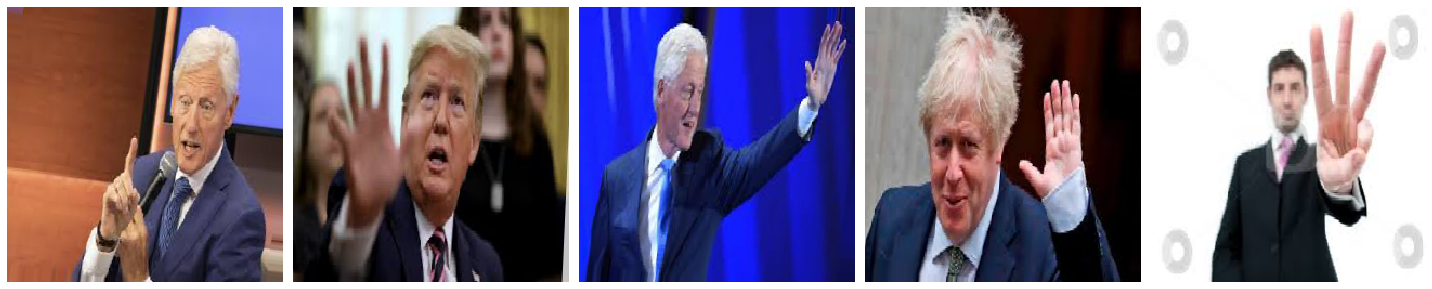

Image 1  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 2  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 3  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 4  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 5  one-hot encoded class: [0. 0. 1. 0. 0.]


In [143]:
plotImages(test1_images[:5], test1_labels[:5])

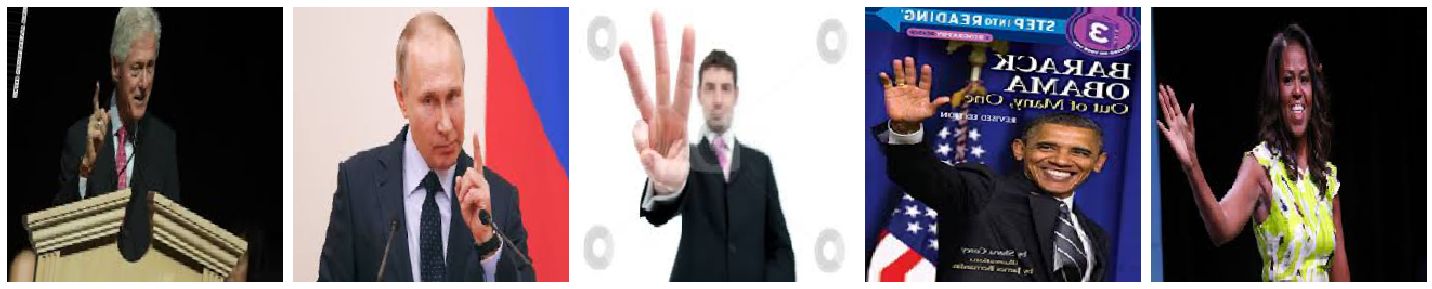

Image 1  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 2  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 3  one-hot encoded class: [0. 0. 1. 0. 0.]
Image 4  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 5  one-hot encoded class: [0. 0. 0. 0. 1.]


In [51]:
plotImages(test1_images[5:10], test1_labels[5:10])

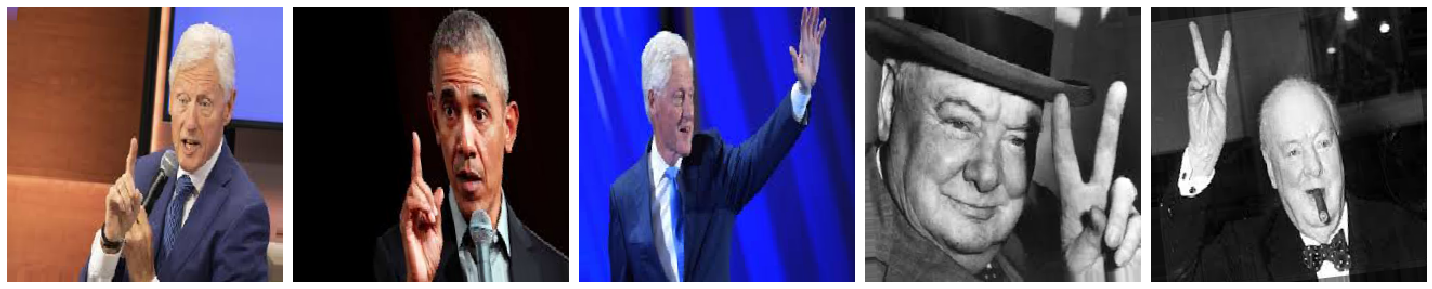

Image 1  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 2  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 3  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 4  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 5  one-hot encoded class: [0. 1. 0. 0. 0.]


In [52]:
plotImages(test1_images[10:15], test1_labels[10:15])

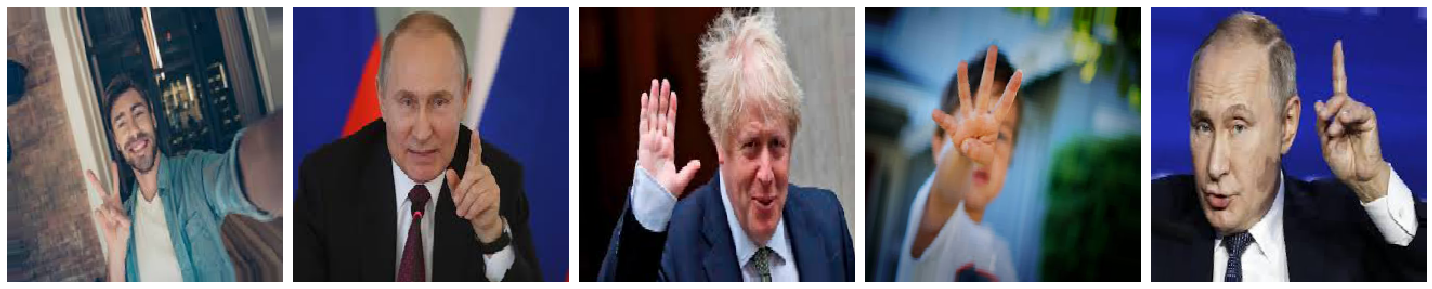

Image 1  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 2  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 3  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 4  one-hot encoded class: [0. 0. 0. 1. 0.]
Image 5  one-hot encoded class: [1. 0. 0. 0. 0.]


In [53]:
plotImages(test1_images[15:20], test1_labels[15:20])

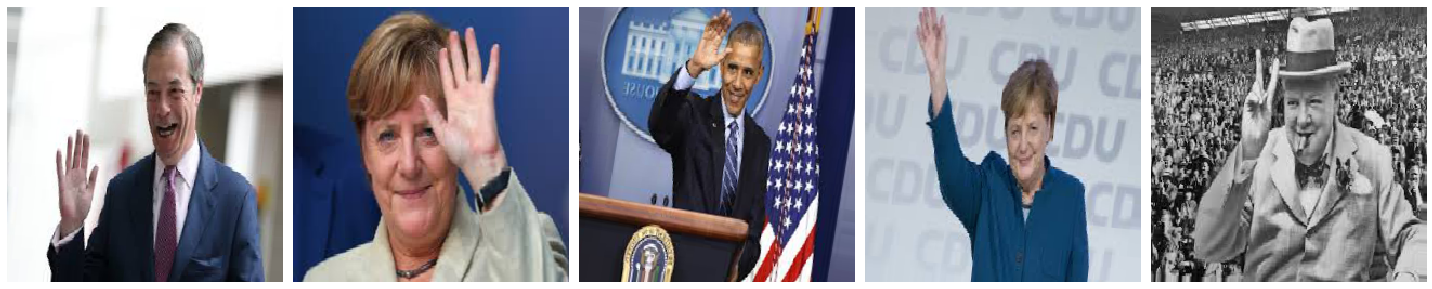

Image 1  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 2  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 3  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 4  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 5  one-hot encoded class: [0. 1. 0. 0. 0.]


In [54]:
plotImages(test1_images[25:30], test1_labels[25:30])

In [147]:
size_test1 = len(test1_labels)
size_test1

30

In [148]:
#model = load_model('model3-two-CNN-layers.h5')

In [149]:
predictions1 = model.predict_classes(test1_images)

In [150]:
print(predictions1)

[2 1 2 2 1 2 2 4 2 2 2 1 4 4 2 2 2 2 3 2 4 4 4 3 3 4 1 2 4 4]


In [151]:
print(len(predictions1))

30


In [152]:
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

In [160]:
print(labels)

[1 1 0 1 4 0 0 2 4 4 0 0 4 1 1 1 0 4 3 0 3 4 2 3 1 4 4 4 4 1]


In [161]:
print(predictions1)

[2 1 2 2 1 2 2 4 2 2 2 1 4 4 2 2 2 2 3 2 4 4 4 3 3 4 1 2 4 4]


In [153]:
type(labels)

numpy.ndarray

In [154]:
type(predictions1)

numpy.ndarray

In [157]:
print(classification_report(labels, predictions1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.25      0.12      0.17         8
           2       0.00      0.00      0.00         2
           3       0.67      0.67      0.67         3
           4       0.44      0.40      0.42        10

    accuracy                           0.23        30
   macro avg       0.27      0.24      0.25        30
weighted avg       0.28      0.23      0.25        30



In [158]:
confusion_matrix(labels, predictions1)

array([[0, 1, 6, 0, 0],
       [0, 1, 4, 1, 2],
       [0, 0, 0, 0, 2],
       [0, 0, 0, 2, 1],
       [0, 2, 4, 0, 4]])

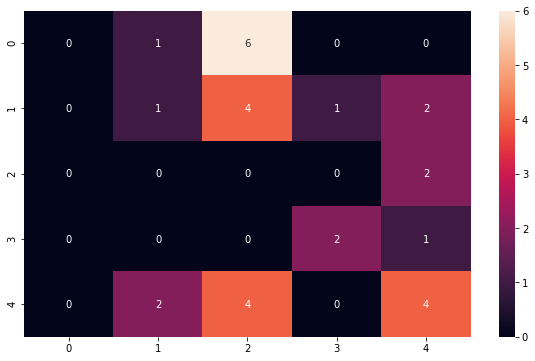

In [159]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions1),annot=True)

In [ ]:
# This result is not very good, the highest numbers should be on the first diagonal
# The accuracy of 23% is close to a random guess of 20%

# Next idea: use cv2.Canny function to detect edges

By using this function, the output shows (almost) only the edges:

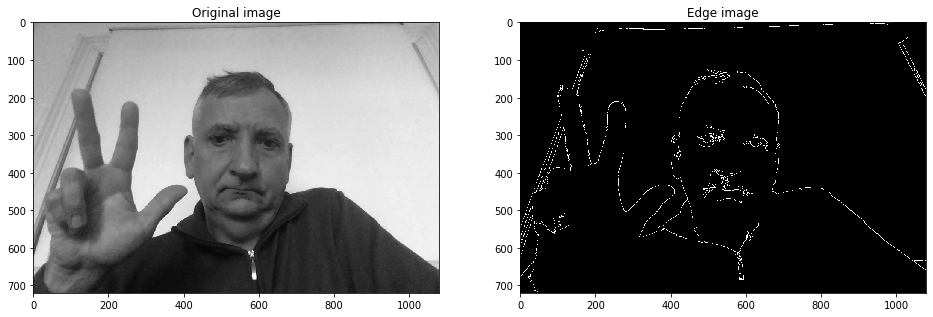

In [32]:
img1 = cv2.imread('./data/train/3/frame3508.jpg',0)
param1 = 20
param2 = 150
img_edges = cv2.Canny(img1,param1,param2)

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img1, cmap='gray')
plt.title('Original image')
plt.subplot(122),plt.imshow(img_edges, cmap='gray')
plt.title('Edge image')

plt.show()

In [33]:
pwd

'/Users/bogdan/python3/c/Springboard/Springboard/Capstone_Project_2'

Create a similar /data directory with cv2.Canny applied, named /data_edges

The original /data directory is not modified

In [34]:
dir_source = './data/train/'
dir_dest = './data_edges/train/'
dir_list = ['1/', '2/', '3/', '4/', '5/']

In [35]:
param1 = 20
param2 = 150

for dir_list_item in dir_list:
    files_list = os.listdir(dir_source+dir_list_item)
    for file_name in files_list:
        img = cv2.imread(dir_source+dir_list_item+file_name,0)
        img_edges = cv2.Canny(img,param1,param2)
        cv2.imwrite(dir_dest+dir_list_item+file_name, img_edges)

In [36]:
dir_source = './data/test/'
dir_dest = './data_edges/test/'
dir_list = ['1/', '2/', '3/', '4/', '5/']

In [37]:
for dir_list_item in dir_list:
    files_list = os.listdir(dir_source+dir_list_item)
    for file_name in files_list:
        img = cv2.imread(dir_source+dir_list_item+file_name,0)
        img_edges = cv2.Canny(img,param1,param2)
        cv2.imwrite(dir_dest+dir_list_item+file_name, img_edges)

Continue by using the same steps as in the beginning

In [38]:
!du -h ./data/train

289M	./data/train/1
230M	./data/train/4
279M	./data/train/3
270M	./data/train/2
246M	./data/train/5
1.3G	./data/train


In [39]:
!du -h ./data_edges/train

173M	./data_edges/train/1
145M	./data_edges/train/4
173M	./data_edges/train/3
169M	./data_edges/train/2
138M	./data_edges/train/5
798M	./data_edges/train


After applying cv2.Canny there is less information because only the edges are shown. Therefore, the jpg files can be compressed better and the overall size is reduced

In [40]:
!du -h ./data/test

126M	./data/test/1
 99M	./data/test/4
122M	./data/test/3
118M	./data/test/2
107M	./data/test/5
572M	./data/test


In [41]:
!du -h ./data_edges/test

 76M	./data_edges/test/1
 63M	./data_edges/test/4
 76M	./data_edges/test/3
 74M	./data_edges/test/2
 60M	./data_edges/test/5
349M	./data_edges/test


In [42]:
!find ./data/train -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

1759 ./data/train/4
1869 ./data/train/5
2074 ./data/train/2
2124 ./data/train/3
2240 ./data/train/1
10068 ./data/train


In [43]:
!find ./data_edges/train -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

1759 ./data_edges/train/4
1869 ./data_edges/train/5
2074 ./data_edges/train/2
2124 ./data_edges/train/3
2240 ./data_edges/train/1
10068 ./data_edges/train


In [44]:
!find ./data/test -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

747 ./data/test/4
799 ./data/test/5
887 ./data/test/2
913 ./data/test/3
962 ./data/test/1
4310 ./data/test


In [45]:
!find ./data_edges/test -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

747 ./data_edges/test/4
799 ./data_edges/test/5
887 ./data_edges/test/2
913 ./data_edges/test/3
962 ./data_edges/test/1
4310 ./data_edges/test


The number of files for each class for /train and /test is the same

In [46]:
print("tensorflow: ", tf.__version__)
print("cv2: ", cv2.__version__)

tensorflow:  2.0.0
cv2:  3.4.2


In [47]:
image0 = imread('./data_edges/train/1/frame10201.jpg')
type(image0)

numpy.ndarray

In [48]:
image0.shape

(720, 1080)

In [53]:
# This function will plot training images in the form of a grid with 1 row and 5 columns 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [54]:
samples=[]
samples.append(imread('./data_edges/train/1/frame10118.jpg')) # sample class 1
samples.append(imread('./data_edges/train/2/frame1.jpg')) # sample class 2
samples.append(imread('./data_edges/train/3/frame3398.jpg')) # sample class 3
samples.append(imread('./data_edges/train/4/frame6765.jpg')) # sample class 4
samples.append(imread('./data_edges/train/5/frame13421.jpg')) # sample class 5

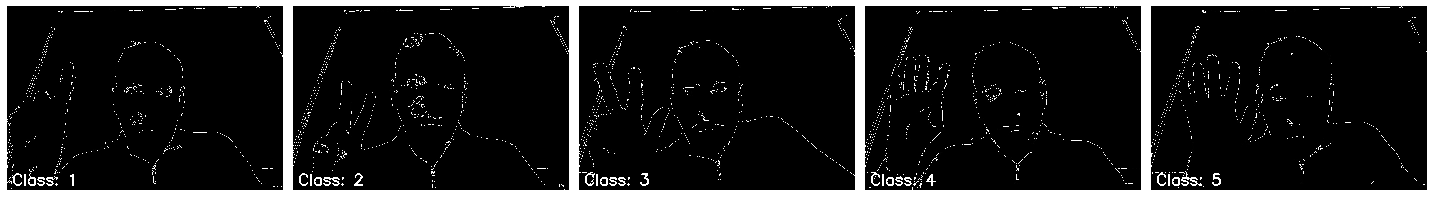

In [55]:
# Print the classes inside each jpeg sample
font      = cv2.FONT_HERSHEY_SIMPLEX
position  = (20,700)
fontScale = 2
fontColor = (255,255,255)
lineType  = 5

cv2.putText(samples[0], 'Class: 1', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[1], 'Class: 2', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[2], 'Class: 3', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[3], 'Class: 4', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[4], 'Class: 5', position, font, fontScale, fontColor, lineType)

plotImages(samples)

In [56]:
# parameters
train_dir = './data_edges/train'
test_dir = './data_edges/test'
batch_size = 16
epochs = 10
# will rescale all jpeg images to 255x255 for having a reasonable time for the training
IMG_HEIGHT = 255
IMG_WIDTH = 255

image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [57]:
image_gen = ImageDataGenerator(rotation_range=10, # randomly rotate the image with <=10 degrees
                               #width_shift_range=0.10, # Shift the pic width by a max of 10%
                               #height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Normalize the image
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [58]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 10061 images belonging to 5 classes.


In [59]:
test_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=test_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                             )

Found 4303 images belonging to 5 classes.


In [60]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [61]:
# This function will plot images in the form of a grid with 1 row and 5 columns 
# where images are placed in each column.
def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    i=1
    for label in labels_arr:
        print("Image", i, " one-hot encoded class:", label)
        i+=1

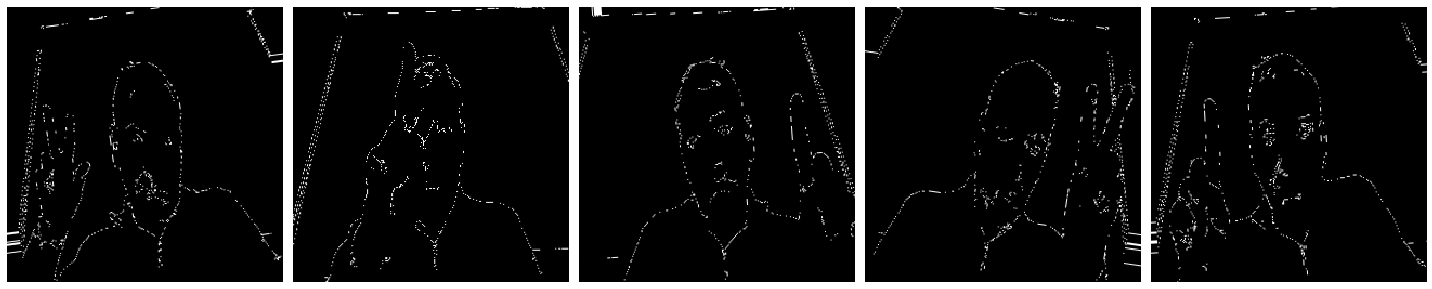

Image 1  one-hot encoded class: [0. 0. 1. 0. 0.]
Image 2  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 3  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 4  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 5  one-hot encoded class: [1. 0. 0. 0. 0.]


In [62]:
plotImages(sample_training_images[:5], sample_training_labels[:5])

In [63]:
sample_training_images[0].shape

(255, 255, 3)

The image is grayscale but for consistency I shall not change anything in the code

In [64]:
print(sample_training_images[0].min(), sample_training_images[0].max())

0.0 1.0


The situation is even better, there are only 2 possible values for a pixel: 0. and 1.

In [80]:
train_data_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

In [81]:
test_data_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

# Model 4, two Conv2D layers with 16 and 32 filters, cv2.Canny

In [83]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(255))
model.add(Activation('relu'))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 255)               6397695   
_________________________________________________________________
activation (Activation)      (None, 255)               0

In [87]:
history = model.fit_generator(train_data_gen,
                              epochs=epochs,
                              validation_data=test_data_gen,
                              callbacks=[early_stop])

Epoch 1/10
629/629 [==============================] - 1410s 2s/step - loss: 0.3910 - accuracy: 0.8618 - val_loss: 0.1409 - val_accuracy: 0.9556
Epoch 2/10
629/629 [==============================] - 1417s 2s/step - loss: 0.0991 - accuracy: 0.9668 - val_loss: 0.0767 - val_accuracy: 0.9749
Epoch 3/10
629/629 [==============================] - 20768s 33s/step - loss: 0.0612 - accuracy: 0.9788 - val_loss: 0.0461 - val_accuracy: 0.9830
Epoch 4/10
629/629 [==============================] - 20884s 33s/step - loss: 0.0391 - accuracy: 0.9859 - val_loss: 0.0354 - val_accuracy: 0.9879
Epoch 5/10
629/629 [==============================] - 1394s 2s/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0610 - val_accuracy: 0.9840
Epoch 6/10
629/629 [==============================] - 1412s 2s/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0406 - val_accuracy: 0.9870


In [88]:
model.save('model4-two-CNN-layers-Canny.h5')

In [89]:
losses_model4 = pd.DataFrame(model.history.history)
losses_model4

loss  accuracy  val_loss  val_accuracy
0  0.390899  0.861843  0.140884      0.955612
1  0.099168  0.966802  0.076725      0.974901
2  0.061267  0.978829  0.046088      0.983035
3  0.039097  0.985886  0.035364      0.987915
4  0.038514  0.987973  0.060988      0.983965
5  0.024989  0.992545  0.040625      0.986986

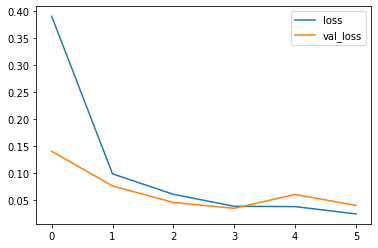

In [90]:
losses_model4[['loss','val_loss']].plot()

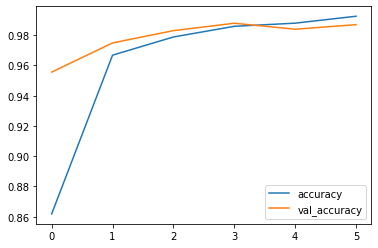

In [91]:
losses_model4[['accuracy','val_accuracy']].plot()

In [92]:
# Model 4 is very similar with model 3 for the train and test datasets.
# Starting from epoch 4, the model tends to overfit and early_stop fired.

In [93]:
model.metrics_names

['loss', 'accuracy']

In [94]:
model.evaluate_generator(test_data_gen)

[0.05040528914773391, 0.9855915]

In [95]:
test_images, test_labels = next(test_data_gen)

In [96]:
size_test = len(test_labels)
size_test

16

In [97]:
test_labels

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [98]:
predictions = model.predict_classes(test_images)

In [99]:
print(predictions)

[2 2 0 2 3 3 4 3 2 2 3 4 4 4 2 2]


In [101]:
labels = []
for result in test_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

In [102]:
print(labels)

[2 2 0 2 3 3 4 3 2 2 3 4 4 4 2 2]


In [103]:
print(predictions)

[2 2 0 2 3 3 4 3 2 2 3 4 4 4 2 2]


In [104]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [107]:
type(labels)

numpy.ndarray

In [108]:
type(predictions)

numpy.ndarray

In [105]:
confusion_matrix(labels, predictions)

array([[1, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 4]])

In [106]:
# As for model 3, for a batch of 16 labels and predictions from the generator there is a 100% match
# The real test is with the new test data used in the previous model
# The new test data must be processed first with cv2.Canny as with /train and /test data

In [112]:
dir_source = './data/test1/'
dir_dest = './data/test2/'
dir_list = ['1/', '2/', '3/', '4/', '5/']

In [125]:
param1 = 20
param2 = 150

for dir_list_item in dir_list:
    files_list = os.listdir(dir_source+dir_list_item)
    for file_name in files_list:
        img = cv2.imread(dir_source+dir_list_item+file_name,0)
        img_edges = cv2.Canny(img,param1,param2)
        cv2.imwrite(dir_dest+dir_list_item+file_name, img_edges)

In [126]:
dir_source = './data/test1/'
dir_dest = './data/test3/'
dir_list = ['1/', '2/', '3/', '4/', '5/']

In [129]:
param1 = 20
param2 = 250 # a higher value here means less details

for dir_list_item in dir_list:
    files_list = os.listdir(dir_source+dir_list_item)
    for file_name in files_list:
        img = cv2.imread(dir_source+dir_list_item+file_name,0)
        img_edges = cv2.Canny(img,param1,param2)
        cv2.imwrite(dir_dest+dir_list_item+file_name, img_edges)

In [151]:
batch_size = 100

In [152]:
test2_dir = './data/test2/'
test2_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=test2_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 30 images belonging to 5 classes.


In [153]:
test2_images, test2_labels = next(test2_data_gen)

In [154]:
test3_dir = './data/test3/'
test3_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=test3_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 30 images belonging to 5 classes.


In [155]:
test3_images, test3_labels = next(test3_data_gen)

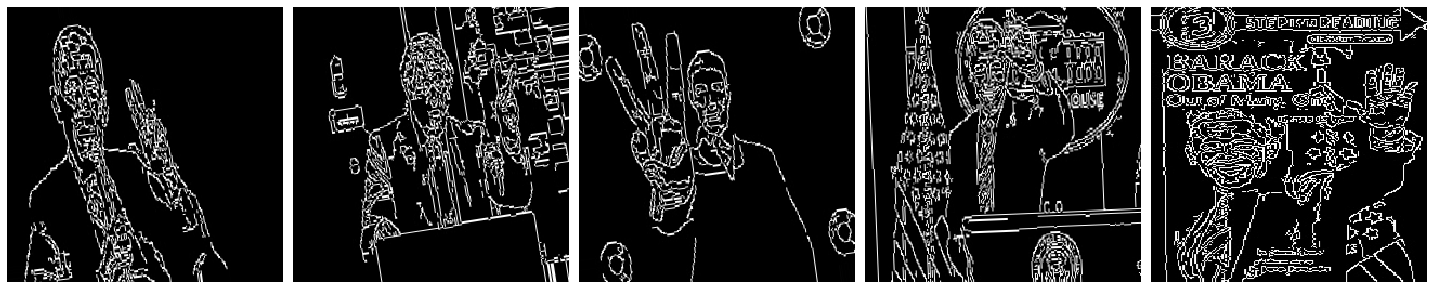

Image 1  one-hot encoded class: [0. 0. 1. 0. 0.]
Image 2  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 3  one-hot encoded class: [0. 0. 1. 0. 0.]
Image 4  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 5  one-hot encoded class: [0. 0. 0. 0. 1.]


In [156]:
plotImages(test2_images[:5], test2_labels[:5])

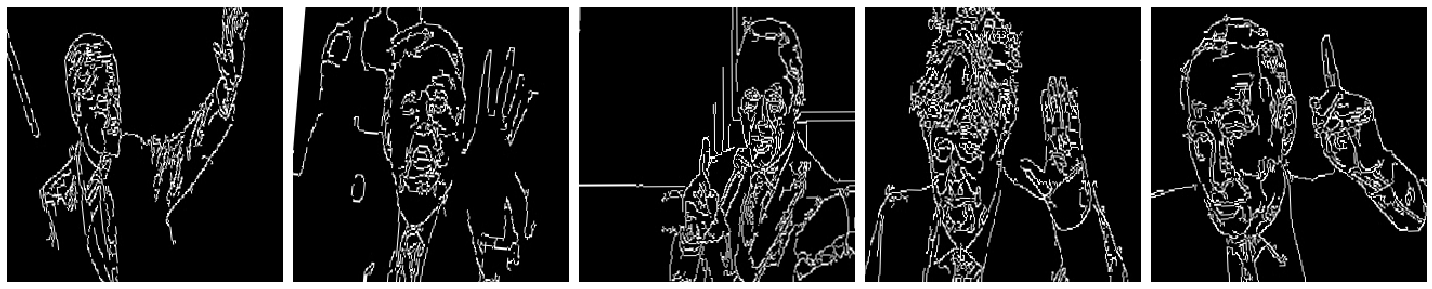

Image 1  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 2  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 3  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 4  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 5  one-hot encoded class: [1. 0. 0. 0. 0.]


In [157]:
plotImages(test3_images[:5], test3_labels[:5])

In [158]:
# There is clearly less information in /test3 data so the model
# might work better on /test3 compared to /test2

In [159]:
predictions2 = model.predict_classes(test2_images)

In [160]:
predictions3 = model.predict_classes(test3_images)

In [161]:
print(predictions2)

[2 2 2 4 4 4 2 4 0 4 4 2 0 2 1 4 4 4 4 4 4 4 3 4 4 3 1 4 4 4]


In [162]:
print(predictions3)

[4 3 4 4 4 3 1 3 4 4 3 0 3 2 4 4 4 4 4 4 2 4 2 4 4 0 4 1 4 4]


In [163]:
# As expected, there are different predictions for /test2 and for /test3

In [169]:
labels3 = []
for result in test3_labels:
    labels3.append(np.where(result == 1)[0][0])
labels3 = np.asarray(labels3)

In [170]:
labels3

array([4, 4, 0, 4, 0, 4, 2, 1, 0, 0, 1, 4, 1, 2, 0, 0, 1, 4, 0, 1, 3, 4,
       4, 1, 1, 3, 4, 3, 4, 1])

In [171]:
print(classification_report(labels3, predictions2))

              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.00      0.00      0.00         8
           2       0.33      1.00      0.50         2
           3       0.50      0.33      0.40         3
           4       0.28      0.50      0.36        10

    accuracy                           0.30        30
   macro avg       0.32      0.40      0.30        30
weighted avg       0.28      0.30      0.24        30



In [172]:
print(classification_report(labels3, predictions3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         8
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         3
           4       0.33      0.60      0.43        10

    accuracy                           0.23        30
   macro avg       0.13      0.22      0.17        30
weighted avg       0.13      0.23      0.17        30



In [173]:
confusion_matrix(labels3, predictions2)

array([[1, 1, 1, 0, 4],
       [1, 0, 0, 0, 7],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 1, 2],
       [0, 1, 3, 1, 5]])

In [174]:
confusion_matrix(labels3, predictions3)

array([[0, 0, 0, 0, 7],
       [0, 0, 0, 3, 5],
       [0, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 1, 2, 6]])

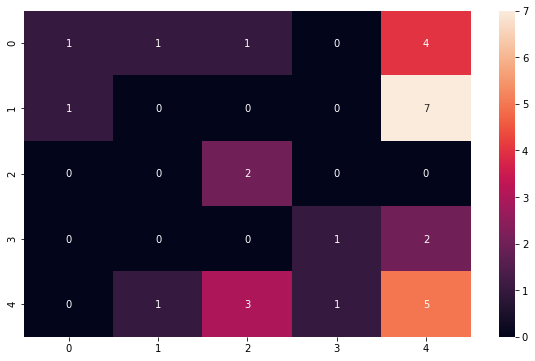

In [175]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels3, predictions2),annot=True)

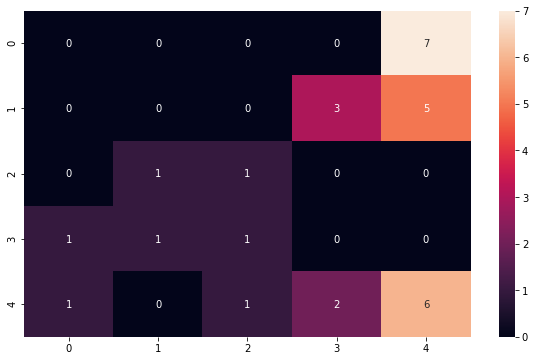

In [176]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels3, predictions3),annot=True)

In [ ]:
# Counterintuitively, the accuracy and other metrics (as F1 score) are better for /test2
# that has a more details than /test3

In conclusion, the best model is for 2 convolution layers and cv2.Canny preprocessing

However, the best option is to get more training data from different persons.

Unfortunatelly, this option would take too much time and effort.

In [61]:
from tensorflow.keras.preprocessing import image

In [62]:
pred_probabilities = model.predict_generator(test_data_gen)

In [63]:
len(pred_probabilities)

4303

In [64]:
pred_probabilities[0:10]

array([[1.00000000e+00, 1.10466909e-20, 1.72471886e-13, 4.07965313e-18,
        9.80287174e-25],
       [1.00000000e+00, 2.85393629e-21, 4.12714012e-20, 7.60418090e-22,
        4.74215832e-29],
       [1.35925828e-28, 2.47001156e-18, 1.00000000e+00, 9.54934489e-17,
        1.34748979e-17],
       [1.00000000e+00, 1.68482106e-16, 8.65511276e-14, 1.04992785e-11,
        2.41589157e-23],
       [1.40129846e-45, 1.79120035e-37, 5.25074614e-24, 4.05572809e-17,
        1.00000000e+00],
       [7.49295903e-11, 2.79768586e-09, 1.00000000e+00, 2.17786320e-13,
        2.74865643e-15],
       [5.26110933e-10, 1.00000000e+00, 1.84564495e-12, 4.24716604e-13,
        5.92119349e-22],
       [9.71112056e-26, 1.89637124e-15, 1.00000000e+00, 2.14806687e-15,
        4.06579496e-18],
       [4.91550262e-26, 5.40953415e-09, 1.00000000e+00, 6.24089972e-13,
        7.38526869e-18],
       [0.00000000e+00, 8.46104854e-34, 2.82812768e-24, 1.01541635e-19,
        1.00000000e+00]], dtype=float32)

In [106]:
test_data_gen.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [107]:
predictions = pred_probabilities > 0.5

In [108]:
predictions

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       ...,
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False,  True, False, False, False]])

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
print(model.metrics_names)
print(model.evaluate(test_data_gen,verbose=0))

['loss', 'accuracy']
[0.011945993254364165, 0.9967465]


In [114]:
!ls ./data/churchill-0-2.jpeg

./data/churchill-0-2.jpeg


In [115]:
test_image = image.load_img("./data/churchill-0-2.jpeg",target_size=image_shape)

In [116]:
type(test_image)

PIL.Image.Image

In [117]:
test_image = image.img_to_array(test_image)

In [118]:
type(test_image)

numpy.ndarray

In [119]:
test_image.shape

(255, 255, 3)

In [120]:
test_image = test_image/255

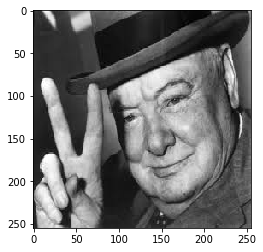

In [121]:
imshow(test_image)

In [122]:
print(test_image.min(), test_image.max())

0.0 1.0


In [123]:
test_image = np.expand_dims(test_image, axis=0)

In [124]:
test_image.shape

(1, 255, 255, 3)

In [125]:
model.predict(test_image)

array([[0.0000000e+00, 3.9780724e-32, 3.0186626e-28, 2.2456944e-35,
        1.0000000e+00]], dtype=float32)

[0. 0. 1. 0. 0.]


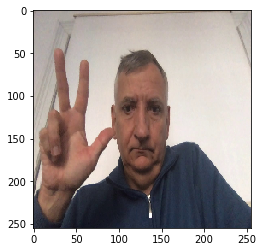

In [144]:
path_test = "./data/test/3/frame3487.jpg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.995 0.005 0.    0.   ]


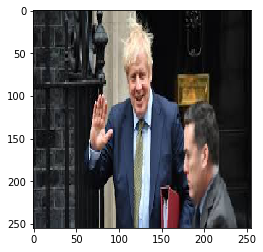

In [139]:
path_test = "./data/johnson-0-5.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 1. 0. 0.]


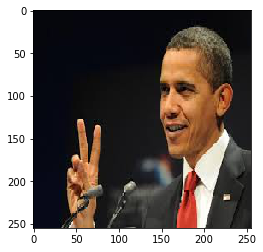

In [140]:
path_test = "./data/obama-0-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 1. 0. 0. 0.]


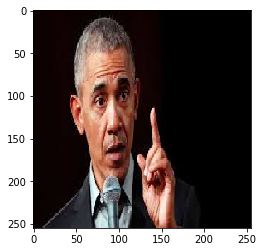

In [141]:
path_test = "./data/obama-1-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 0. 1.]


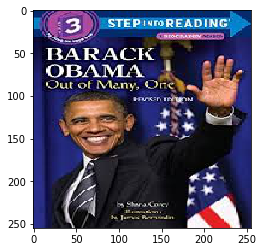

In [142]:
path_test = "./data/obama-1-5.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 1. 0. 0.]


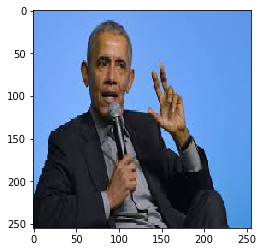

In [143]:
path_test = "./data/obama-2-3.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 1. 0. 0.]


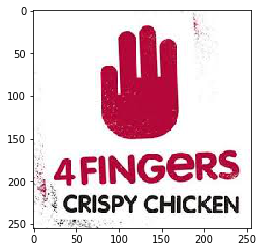

In [145]:
path_test = "./data/4fingers.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.003 0.953 0.044]


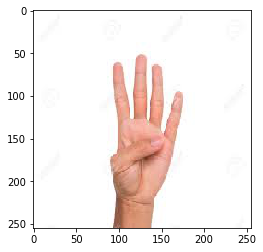

In [146]:
path_test = "./data/4fingers-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

In [147]:
# probably it is the background that has a big influence, here the model predicted correctly

[0. 0. 0. 0. 1.]


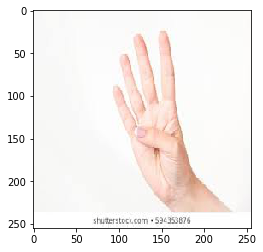

In [149]:
path_test = "./data/4fingers-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 1. 0.]


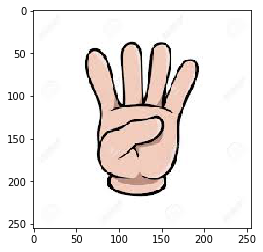

In [150]:
path_test = "./data/4fingers-3.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.022 0.006 0.965 0.007]


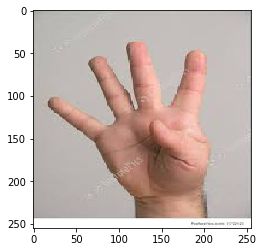

In [151]:
path_test = "./data/4fingers-4.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.014 0.986 0.   ]


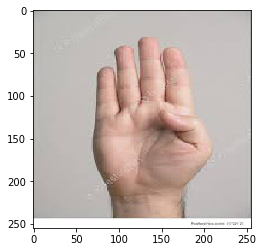

In [152]:
path_test = "./data/4fingers-5.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.133 0.007 0.86 ]


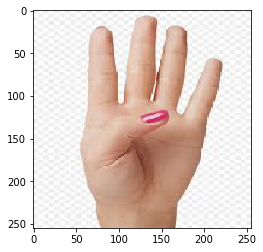

In [153]:
path_test = "./data/4fingers-6.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.032 0.    0.005 0.963]


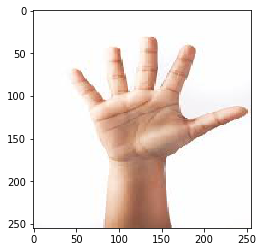

In [154]:
path_test = "./data/5fingers-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 1. 0. 0.]


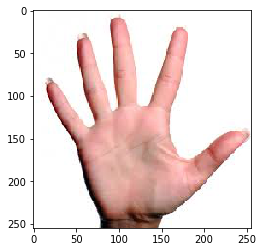

In [155]:
path_test = "./data/5fingers-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.    0.922 0.078]


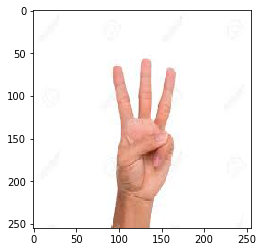

In [156]:
path_test = "./data/3fingers-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.    0.018 0.982]


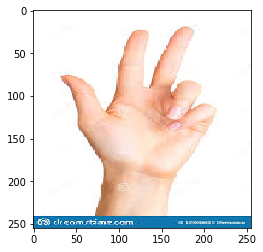

In [157]:
path_test = "./data/3fingers-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 1. 0.]


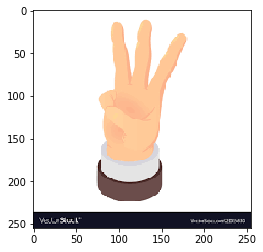

In [159]:
path_test = "./data/3fingers-3.png"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 1. 0. 0. 0.]


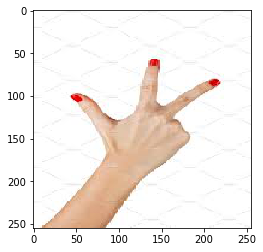

In [160]:
path_test = "./data/3fingers-4.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 0. 1.]


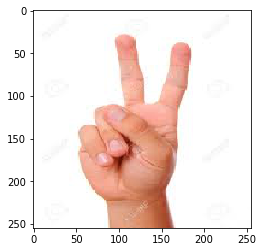

In [161]:
path_test = "./data/2fingers-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 1. 0.]


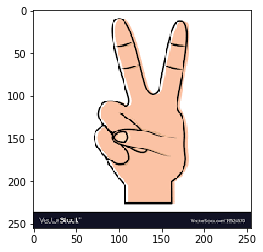

In [163]:
path_test = "./data/2fingers-2.png"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.991 0.    0.009 0.   ]


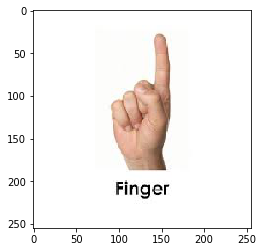

In [164]:
path_test = "./data/1finger-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.026 0.    0.974 0.   ]


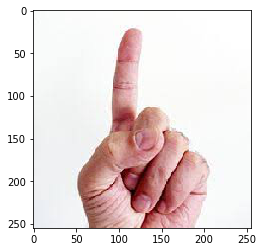

In [165]:
path_test = "./data/1finger-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

In [104]:
# This function will plot images in the form of a grid with 1 row and 5 columns 
# where images are placed in each column.
def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    i=1
    for label in labels_arr:
        print("Image", i, " one-hot encoded class:", label)
        i+=1

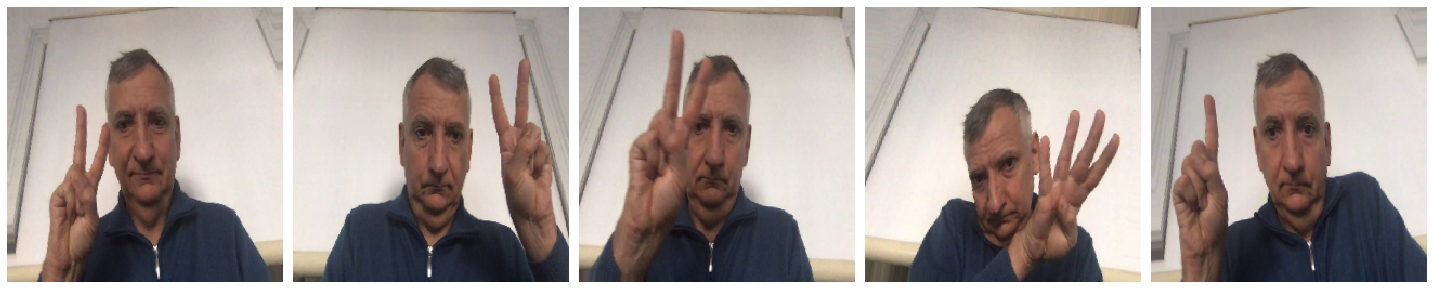

Image 1  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 2  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 3  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 4  one-hot encoded class: [0. 0. 0. 1. 0.]
Image 5  one-hot encoded class: [1. 0. 0. 0. 0.]


In [105]:
plotImages(sample_training_images[:5], sample_training_labels[:5])

In [84]:
a, b = test_data_gen[0]

In [85]:
a.shape

(16, 255, 255, 3)

In [86]:
b

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [83]:
print(np.around(pred_probabilities[0:10],3))

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


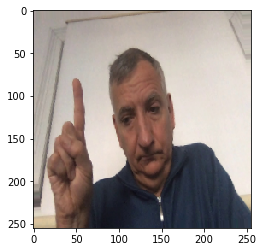

In [87]:
img = a[0,:,:,:]
imshow(img)

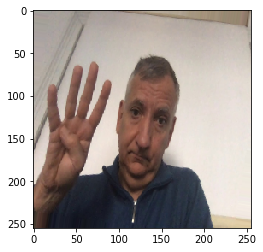

In [88]:
img = a[1,:,:,:]
imshow(img)

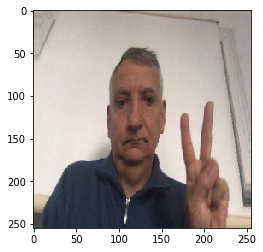

In [89]:
img = a[2,:,:,:]
imshow(img)

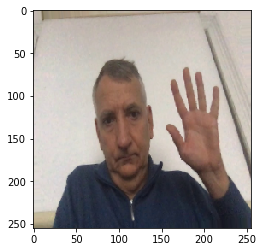

In [90]:
img = a[3,:,:,:]
imshow(img)

In [91]:
sample_training_images, sample_training_labels = next(train_data_gen)

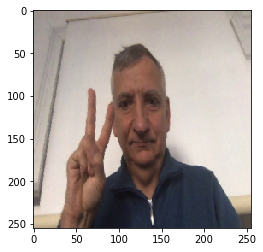

In [93]:
imshow(sample_training_images[0])

In [95]:
sample_training_labels[0]

array([0., 1., 0., 0., 0.], dtype=float32)

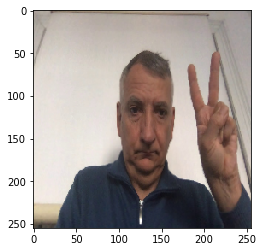

In [96]:
imshow(sample_training_images[1])

In [97]:
sample_training_labels[1]

array([0., 1., 0., 0., 0.], dtype=float32)

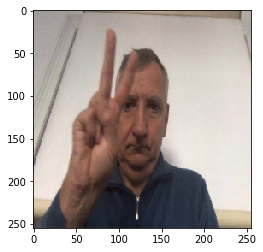

In [98]:
imshow(sample_training_images[2])

In [99]:
sample_training_labels[2]

array([0., 1., 0., 0., 0.], dtype=float32)

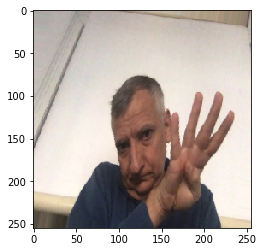

In [101]:
imshow(sample_training_images[3])

In [102]:
sample_training_labels[3]

array([0., 0., 0., 1., 0.], dtype=float32)

In [74]:
param1 = 20
param2 = 180
img_edges = cv2.Canny(img,param1,param2)
plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img)
plt.title('Original image')
plt.subplot(122),plt.imshow(img_edges, cmap='gray')
plt.title('Edge image')

plt.show()

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/canny.cpp:947: error: (-215:Assertion failed) _src.depth() == 0 in function 'Canny'


In [75]:
type(img)

numpy.ndarray

In [77]:
img.shape

(255, 255, 3)

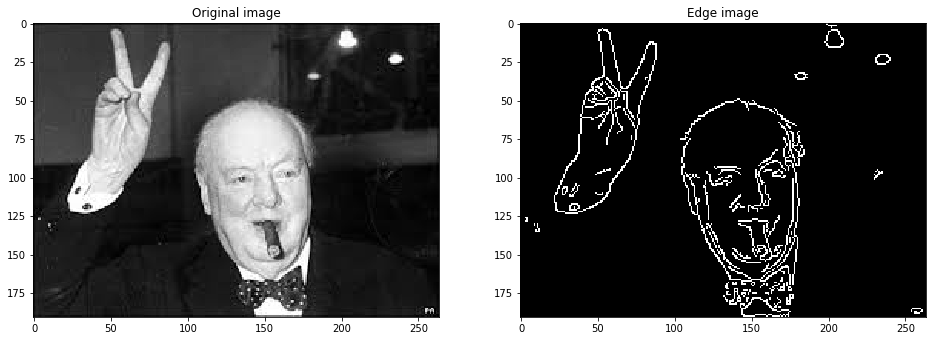

In [150]:
img1 = cv2.imread('./data/churchill-1-2.jpeg',0)
param1 = 120
param2 = 250
img_edges = cv2.Canny(img1,param1,param2)

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img1, cmap='gray')
plt.title('Original image')
plt.subplot(122),plt.imshow(img_edges, cmap='gray')
plt.title('Edge image')

plt.show()

In [98]:
type(img1)

numpy.ndarray

In [99]:
img1.shape

(720, 1080)

In [100]:
print(img1.min(), img1.max())

12 255


In [94]:
!ls './data/train/2/frame1778.jpg'

./data/train/2/frame1778.jpg


In [177]:
img1 = cv2.imread('./data/train/2/frame1801.jpg',0)

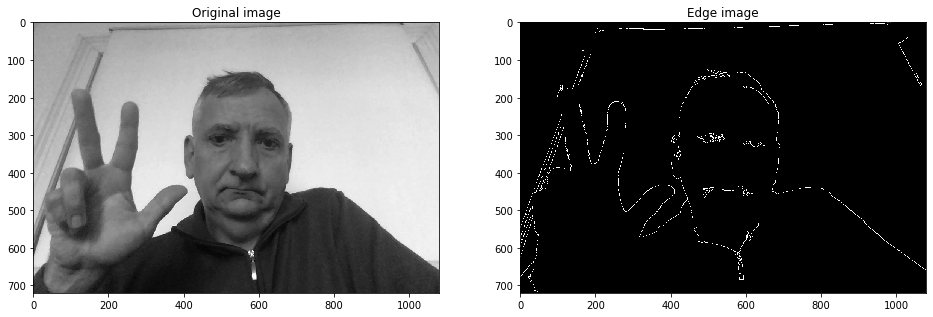

In [178]:
img1 = cv2.imread('./data/train/3/frame3508.jpg',0)
param1 = 20
param2 = 200
img_edges = cv2.Canny(img1,param1,param2)

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img1, cmap='gray')
plt.title('Original image')
plt.subplot(122),plt.imshow(img_edges, cmap='gray')
plt.title('Edge image')

plt.show()